# Batch Normalization

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [ ]:
# Build MLP without batch normalization
def build_mlp_no_bn():
  model=models.Sequential([
      layers.Dense(256,activation='relu'),
      layers.Dense(128,activation='relu'),
      layers.Dense(10,activation='softmax')

  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
# build MLP with Batch Normalization
def  build_mlp_with_bn():
  model=models.Sequential([
      layers.InputLayer(input_shape=(784,)),
      layers.Dense(256),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(128),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dense(10),
      layers.Activation('softmax')

  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
# Train both Models
print("\n Training without Batch Normalization")
model_no_bn=build_mlp_no_bn()
history_no_bn=model_no_bn.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)


print("\n Training with Batch Normalization")
model_bn=build_mlp_with_bn()
history_bn=model_bn.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2,verbose=1)


 Training without Batch Normalization
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8674 - loss: 0.4617 - val_accuracy: 0.9602 - val_loss: 0.1304
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9707 - loss: 0.0983 - val_accuracy: 0.9688 - val_loss: 0.0994
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9817 - loss: 0.0611 - val_accuracy: 0.9732 - val_loss: 0.0901
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9875 - loss: 0.0380 - val_accuracy: 0.9727 - val_loss: 0.0890
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9902 - loss: 0.0317 - val_accuracy: 0.9760 - val_loss: 0.0839
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9740 - val_loss: 0.1010
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9938 - loss: 0.0208 - val_accuracy: 0.9771 - val_loss: 0.0817
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy:

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8844 - loss: 0.3967 - val_accuracy: 0.9664 - val_loss: 0.1090
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9742 - loss: 0.0896 - val_accuracy: 0.9690 - val_loss: 0.1009
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9837 - loss: 0.0538 - val_accuracy: 0.9707 - val_loss: 0.1006
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9866 - loss: 0.0428 - val_accuracy: 0.9751 - val_loss: 0.0853
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9897 - loss: 0.0325 - val_accuracy: 0.9743 - val_loss: 0.0880
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9916 - loss: 0.0267 - val_accuracy: 0.9763 - val_loss: 0.0826
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9930 - loss: 0.0219 - val_accuracy: 0.9748 - val_loss: 0.0902
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9944 - loss: 0.0180 - val_accura

In [ ]:
test_loss_no_bn, test_acc_no_bn = model_no_bn.evaluate(x_test, y_test, verbose=1)
test_loss_bn, test_acc_bn = model_bn.evaluate(x_test, y_test, verbose=1)
print(f"Test accuracy without Batch Normalization: {test_acc_no_bn:.4f}")
print(f"Test accuracy with Batch Normalization: {test_acc_bn:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9747 - loss: 0.1089
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1094
Test accuracy without Batch Normalization: 0.9801
Test accuracy with Batch Normalization: 0.9752


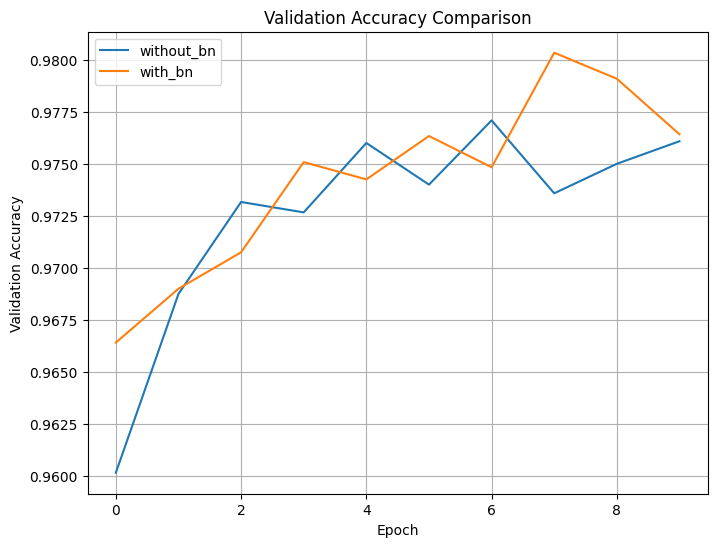

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history_no_bn.history['val_accuracy'], label='without_bn')
plt.plot(history_bn.history['val_accuracy'], label='with_bn')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

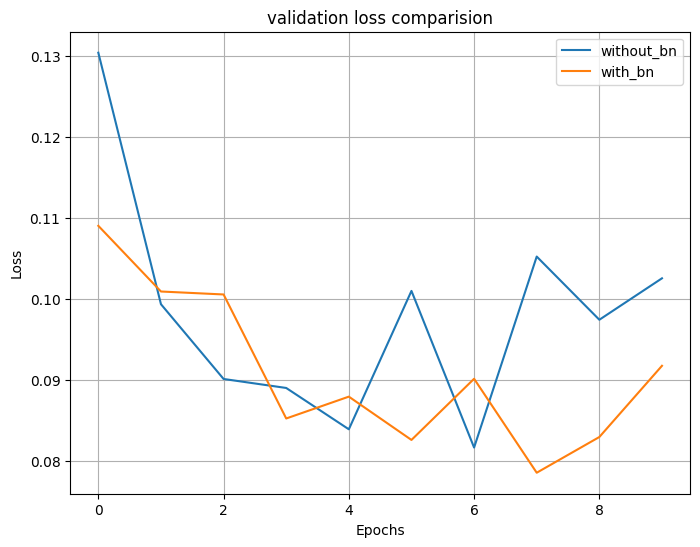

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history_no_bn.history['val_loss'], label='without_bn')
plt.plot(history_bn.history['val_loss'], label='with_bn')
plt.title('validation loss comparision')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()